In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 11 days
Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 11 days


In [155]:
mi = lambda x: sin(x)
om = 0.2

def draw_n(n):
    X = numpy.random.uniform(0. ,6., n)
    X.sort()
    Y = array([numpy.random.normal(mi(x), om) for x in X])
    return X, Y

In [156]:
Xp,Y = draw_n(30)

In [259]:
alpha = lambda D: array([ exp(-(abs(Y[i] - mi(Xp[i])))/D) for i in range(Xp.size)])
D = 1.0
A = alpha(D)
T = array([0.2])
X = array([array([1, x, x**2, x**3, x**4]) for x in Xp])
Y.shape, X.shape, T.shape, A.shape, diag(A).shape

((30,), (30, 5), (1,), (30,), (30, 30))

In [291]:
T_Opt = (A.T*Y.T).dot(X).dot(inv(X.T.dot(diag(A)).dot(X)))

In [377]:
C = logspace(0., 10., 5)
C

array([  1.00000000e+00,   3.16227766e+02,   1.00000000e+05,
         3.16227766e+07,   1.00000000e+10])

In [378]:
T_Opt2 = X.T.dot(A*Y.T).dot(inv(X.T.dot(diag(A)).dot(X) - diag(C)))

In [379]:
T_Opt.dot(X[0]), T_Opt2.dot(X[0]), T_Opt, T_Opt2

(-0.18410244289432845,
 -0.43201163519912339,
 array([-0.18749566,  1.91240643, -0.85147368,  0.07300551,  0.00295432]),
 array([ -4.32173291e-01,   9.10332718e-02,   1.73479443e-03,
          2.81141760e-05,   4.41628175e-07]))

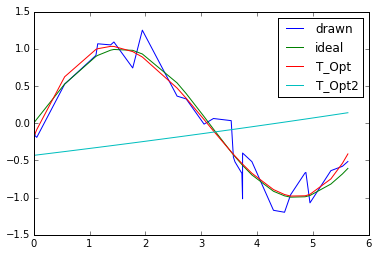

In [380]:
plot(Xp, Y, label='drawn')
plot(Xp, mi(Xp), label='ideal')
plot(Xp, [T_Opt.dot(x) for x in X], label='T_Opt')
plot(Xp, [T_Opt2.dot(x) for x in X], label = 'T_Opt2')
legend()

In [359]:
T_Opt.dot(X.T.dot(X))

array([ -4.11774064e+00,  -3.85056326e+01,  -2.07980818e+02,
        -1.02198473e+03,  -4.94331471e+03])